In [1]:
### Setting up the environment
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### List of constants and sources

'''
list_catchments = 'https://en.wikipedia.org/wiki/List_of_rivers_of_Scotland'


### Get water catchment boundaries (.shp files) from nrfs
### gauge daily flow (m3) and catchment rainfall also available but not downloaded
nrfa_url: 'https://nrfa.ceh.ac.uk/data/search'

### replace station_id in url to get respective data
catchment boundary: https://nrfa.ceh.ac.uk/data/station/spatial_download/<station_id>
daily river flow: https://nrfa.ceh.ac.uk/data/station/download?stn=<station_id>&dt=gdf
catchment rainfall: https://nrfa.ceh.ac.uk/data/station/download?stn=<station_id>&dt=cdr
Use this site for converting OSGridRef (which SEPA and NRFA use) to WGS84 (open street map): https://www.nearby.org.uk/coord.cgi?
use this for overlaying rivers: https://osdatahub.os.uk/downloads/open/OpenRivers
'''
### These station IDs are from SEPA and are the same as NRFAs (SEPA data when archived goes to NRFA)
### This dictionary helps relate wiki QIDs to the respective SEPA/NRFS data.
### As this dictionary grows to include more sites, it may be better to move this into an independent location.
river_ids ={
            'dee': {'wiki_id':'Q964949',
                    'station_id':{ 12002:
                                    {'name':'park',
                                    'gridref':'NO7973998317',
                                    'wgs84_lat': 57.075425,
                                    'wgs84_long': -2.335825
                                    },
                                
                                12003:
                                    {'name':'pohollick',
                                    'gridref':'NO3439596531',
                                    'wgs84_lat': 57.055147,
                                    'wgs84_long': -3.083181
                                    },
                                
                                12006:
                                    {'name':'invergairn',
                                    'gridref':'NO3523197050',
                                    'wgs84_lat': 57.059927,
                                    'wgs84_long': -3.069535
                                    },
                                
                                12005:
                                    {'name':'invermuick',
                                    'gridref':'NO3642394759',
                                    'wgs84_lat': 57.039516,
                                    'wgs84_long': -3.049305
                                    },
                                
                                12007:
                                    {'name':'marlodge',
                                    'gridref':'NO0978889522',
                                    'wgs84_lat': 56.988041,
                                    'wgs84_long': -3.486198
                                    },
                                
                                12001:
                                    {'name':'woodend',
                                    'gridref':'NO6348295613',
                                    'wgs84_lat': 57.050130,
                                    'wgs84_long': -2.603567
                                    },
                                
                                12008:
                                    {'name':'heugh-head',
                                    'gridref':'NO6870392800',
                                    'wgs84_lat': 57.025247,
                                    'wgs84_long': -2.517161
                                    }
                                }
                    },
            'don': {'wiki_id':'Q387736',
                    'station_id':{ 11001:
                                        {'name':'?'},
                                   11002:
                                        {'name':'?'},
                                   11003:
                                        {'name':'?'},
                                   11005:
                                        {'name':'?'},
                                   11006:
                                        {'name':'?'}
                                 } 
                    },
            'teith': {'wiki_id':'Q1637976',
                      'station_id':{ 18003:
                                        {'name':'name'}
                                 }
                    }
}

### Load data from filenames
parent_folder = os.getcwd()
data_folder =  parent_folder + '/data/'


In [3]:
### Prepares data for charting

### extracts data from all .json files in the folder
### appends them into a long table format
### site name and data type attributes are extracted from the folder/file paths and added

all_data = pd.DataFrame()

folders = {
    'riverdee/deeflow/': 'river',
    'riverdee/deerain/': 'rain'}

for folder in folders:
    for dirname, _, filenames in os.walk(data_folder + folder):
        for filename in filenames:
            if filename.rsplit('.',1)[1] == 'json':
                site = filename.rsplit('.',1)[0]
                site_data = pd.read_json(data_folder + folder + filename)
                site_data['Site'] = site.replace("riverdee-", "").replace("rain-", "")
                site_data['Type'] = folders[folder]
                site_data = site_data.rename(columns={'Timestamp':'DateTime','title':'Value'})
                all_data = all_data.append(site_data)
    all_data = all_data.reset_index(drop=True)
all_data

,DateTime,Value,Site,Type,href
0,1975-07-02,4.962,pohollick,river,NaN
1,1975-07-03,5.109,pohollick,river,NaN
2,1975-07-04,5.191,pohollick,river,NaN
3,1975-07-05,4.771,pohollick,river,NaN
4,1975-07-06,4.471,pohollick,river,NaN
...,...,...,...,...,...
289178,2017-12-27,1.200,pohollick,rain,27000.0
289179,2017-12-28,0.100,pohollick,rain,27000.0
289180,2017-12-29,3.600,pohollick,rain,27000.0
289181,2017-12-30,7.100,pohollick,rain,27000.0


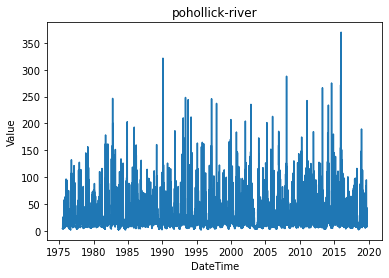

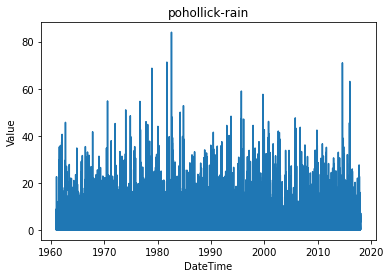

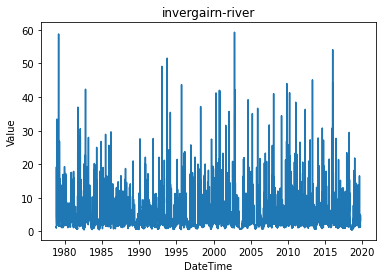

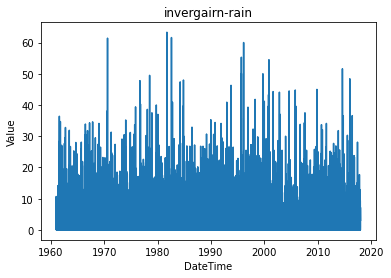

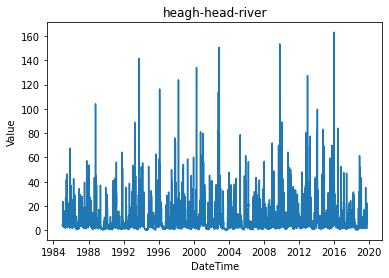

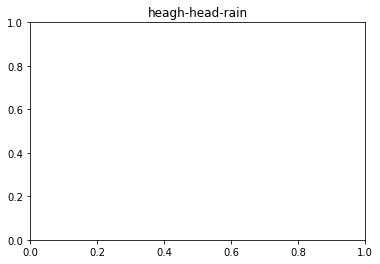

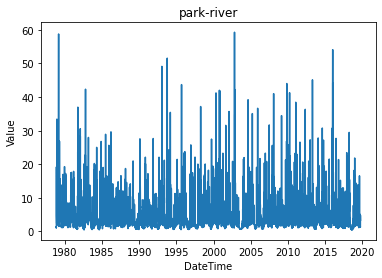

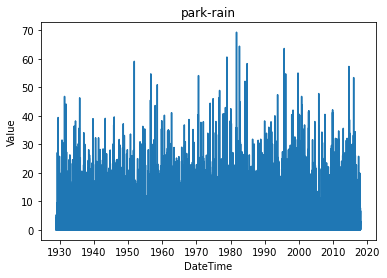

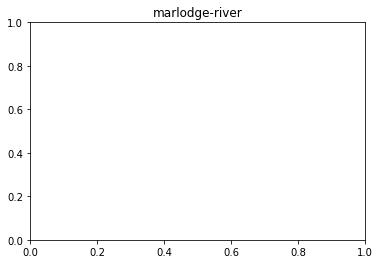

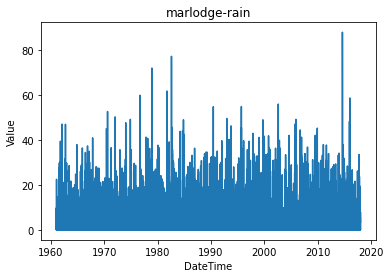

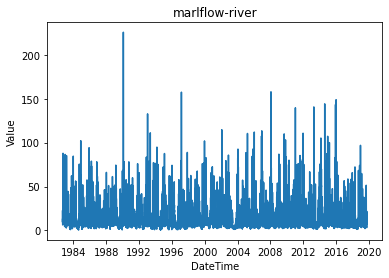

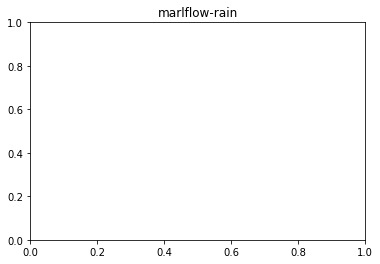

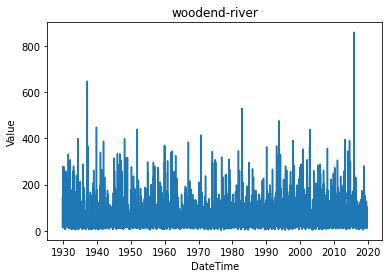

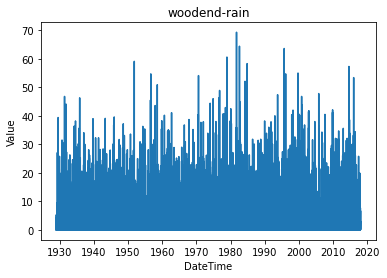

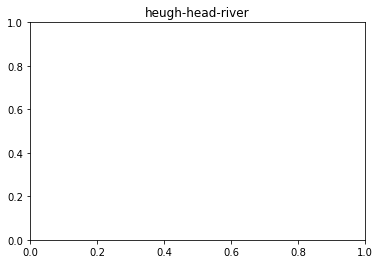

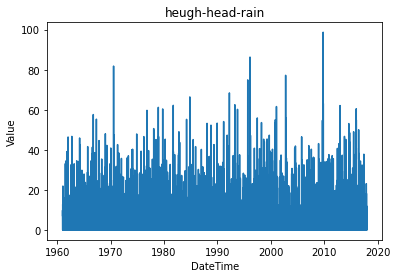

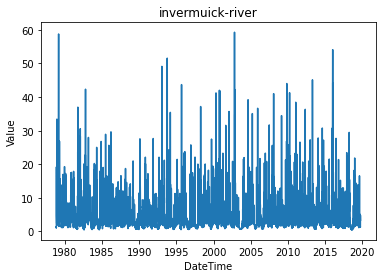

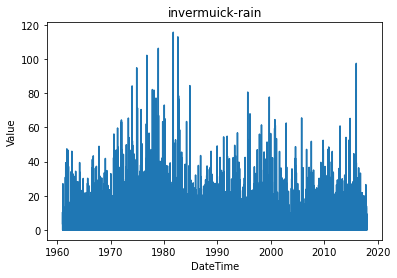

In [4]:
### this creates a site + data type location and saves it in the respective wiki_id image folder

### in future, wiki_id can be dynamic, for now it is static.
wiki_id = 'Q964949'

### for each type of data + site
type_list = list(set(all_data['Type']))
site_list = list(set(all_data['Site']))

for s in site_list:
    for t in type_list:
        temp = all_data[(all_data['Type']==t)&(all_data['Site']==s)]
        sns.lineplot(x='DateTime', y='Value', data=temp)
        title = s + '-' + t
        plt.title(title)
        plt.savefig(parent_folder + '/images/' + wiki_id + '/' + title +'.png')
        plt.show()
        plt.close()

In [6]:
### saves coordinates for known stations as a .csv file

coords = pd.DataFrame()
for station in river_ids['dee']['station_id']:
    data = river_ids['dee']['station_id'][station]
    temp = pd.DataFrame.from_dict([data]) 
    coords = coords.append(temp)

coords.to_csv(parent_folder + '/data/coords.csv', index=False)
coords


,name,gridref,wgs84_lat,wgs84_long
0,park,NO7973998317,57.075425,-2.335825
0,pohollick,NO3439596531,57.055147,-3.083181
0,invergairn,NO3523197050,57.059927,-3.069535
0,invermuick,NO3642394759,57.039516,-3.049305
0,marlodge,NO0978889522,56.988041,-3.486198
0,woodend,NO6348295613,57.050130,-2.603567
0,heugh-head,NO6870392800,57.025247,-2.517161
